# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
import time
import unicodedata
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
#Perform weather check on each city in the cities list
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
main_json = list()
units = "imperial"
# Define batch_size
set_size = 50
# Find the number of sets
overflow = len(cities) % set_size
num_sets = int(len(cities)/set_size)
if overflow>0:
    num_sets+=1

for s in range(num_sets):
    record = 1
    for city in cities[s*set_size:s*set_size+set_size]:
        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #{'cod': '404', 'message': 'city not found'}
        if weather_json["cod"]!= '404':
            main_json.append(weather_json)
            print("Processing Record "+ str(record) +" of Set " + str(s+1) + " | "+ city)
            record+=1
        else:
            print("City not found. Skipping...")
    time.sleep(3)

Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | oktyabrskoye
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | atambua
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | tshikapa
Processing Record 9 of Set 1 | phulabani
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | kiunga
Processing Record 13 of Set 1 | tongren
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | berlevag
Processing Record 16 of Set 1 | atuona
City not found. Skipping...
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | limenaria
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | honiara
Processing Record 22 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 23 of Set 1 | arraial do c

Processing Record 9 of Set 5 | marstal
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | flinders
Processing Record 12 of Set 5 | tuktoyaktuk
Processing Record 13 of Set 5 | big bend
Processing Record 14 of Set 5 | santa comba
Processing Record 15 of Set 5 | tukrah
Processing Record 16 of Set 5 | shemonaikha
Processing Record 17 of Set 5 | mitsamiouli
Processing Record 18 of Set 5 | grindavik
Processing Record 19 of Set 5 | sorland
Processing Record 20 of Set 5 | oil city
Processing Record 21 of Set 5 | victoria
Processing Record 22 of Set 5 | nizhnevartovsk
Processing Record 23 of Set 5 | kahului
Processing Record 24 of Set 5 | salalah
Processing Record 25 of Set 5 | oranjemund
Processing Record 26 of Set 5 | gashua
Processing Record 27 of Set 5 | iroquois falls
City not found. Skipping...
Processing Record 28 of Set 5 | sitka
Processing Record 29 of Set 5 | guerrero negro
Processing Record 30 of Set 5 | senanga
Processing Record 31 of Set 5 | atar
Processing Reco

Processing Record 17 of Set 9 | alvorada
Processing Record 18 of Set 9 | port macquarie
Processing Record 19 of Set 9 | pont-a-mousson
Processing Record 20 of Set 9 | mamakan
Processing Record 21 of Set 9 | calella
Processing Record 22 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 9 | clyde river
Processing Record 24 of Set 9 | arman
Processing Record 25 of Set 9 | bonnyville
Processing Record 26 of Set 9 | portland
City not found. Skipping...
City not found. Skipping...
Processing Record 27 of Set 9 | mehamn
Processing Record 28 of Set 9 | pandan
Processing Record 29 of Set 9 | chokurdakh
Processing Record 30 of Set 9 | goundi
Processing Record 31 of Set 9 | maldonado
Processing Record 32 of Set 9 | luderitz
Processing Record 33 of Set 9 | tazovskiy
Processing Record 34 of Set 9 | talcahuano
Processing Record 35 of Set 9 | loreto
Processing Record 36 of Set 9 | parry sound
Processing Record 37 of Set 9 | cabinda
Processing Record 38 of Set 9 | hamilton
Processing Re

Processing Record 18 of Set 13 | ola
Processing Record 19 of Set 13 | amazar
Processing Record 20 of Set 13 | ghanzi
Processing Record 21 of Set 13 | kostyantynivka
Processing Record 22 of Set 13 | kutno
Processing Record 23 of Set 13 | jian
Processing Record 24 of Set 13 | podgornoye
Processing Record 25 of Set 13 | havoysund
Processing Record 26 of Set 13 | puerto ayacucho
Processing Record 27 of Set 13 | kemin
Processing Record 28 of Set 13 | zhezkazgan
Processing Record 29 of Set 13 | great bend
Processing Record 30 of Set 13 | la orilla
Processing Record 31 of Set 13 | west wendover
City not found. Skipping...
Processing Record 32 of Set 13 | trincomalee



## Convert Raw Data to DataFrame
* Save as csv

In [33]:
filepath = "../" + output_data_file
with open(filepath, 'w',newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["City","Lat","Lng","MaxTemp","Humidity","Cloudiness","Wind Speed","Country","Date"])
    for city in main_json:
        #name = unicodedata.normalize('NFKD',city["name"]).encode('utf-8','ignore') 
        name = city["name"].encode('utf-8')
        lat = city["coord"]["lat"]
        lng = city["coord"]["lon"]
        max_temp = city["main"]["temp_max"]
        humidity = city["main"]["humidity"]
        cloudiness = city["clouds"]["all"]
        wind_speed = city["wind"]["speed"]
        country = city["sys"]["country"]
        date = city["dt"]
        writer.writerow([name,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date])

In [34]:
weather_df = pd.read_csv(filepath)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

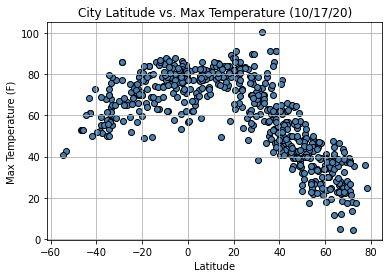

In [35]:
# Convert date to MM/DD/YY format
datevar = weather_df["Date"].astype(int)
for i in range(len(datevar)):
    weather_df["Date"] = datetime.datetime.fromtimestamp(datevar[i]).strftime('%m/%d/%y')
plt.title("City Latitude vs. Max Temperature ("+weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['MaxTemp'],c='steelblue',edgecolor='black')
plt.savefig('../output_data/CityLatitude_MaxTemp.png')
plt.show()

The plot above shows that maximum temperature rises with latitude until latitude is equal to ~20, and then it declines. 

### Latitude vs. Humidity Plot

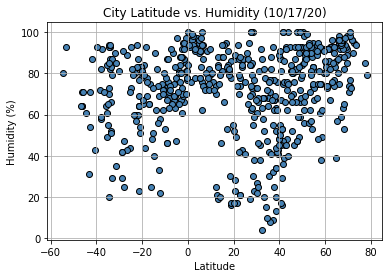

In [36]:
plt.title("City Latitude vs. Humidity ("+ weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['Humidity'],c='steelblue',edgecolor='black')

plt.savefig('../output_data/CityLatitude_Humidity.png')
plt.show()

There is no clear observable pattern or trend between latitude and humidity, but there is a general clustering in humidity between 60 and 100 across all latitudes. 

### Latitude vs. Cloudiness Plot

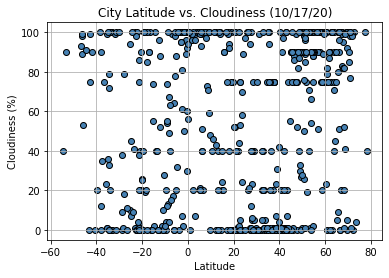

In [37]:
plt.title("City Latitude vs. Cloudiness ("+ weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],c='steelblue',edgecolor='black')

plt.savefig('../output_data/Latitude_Cloudiness.png')
plt.show()

There is no observable relation between latitude and cloudiness. 

### Latitude vs. Wind Speed Plot

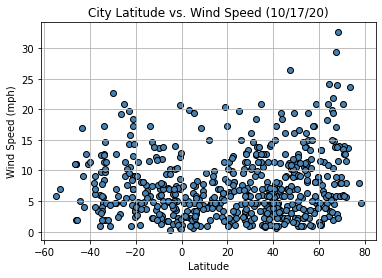

In [38]:
plt.title("City Latitude vs. Wind Speed ("+ weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],c='steelblue',edgecolor='black')

plt.savefig('../output_data/Latitude_WindSpeed.png')
plt.show()

Wind speed is clustered in the range of 0-15 mph across latitudes, with a smaller number of cities with latitudes that range from 15-30 mph. 

## Linear Regression

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [39]:
#Split weather_df into northern and southern hemisphere
north_weather_df = weather_df[weather_df["Lat"]>=0]
south_weather_df = weather_df[weather_df["Lat"]<0]

The r-squared is: 0.7087571344641076


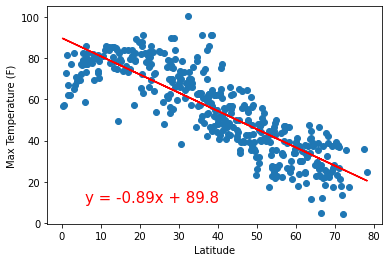

In [40]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/NorthernHemisphere_MaxTemp_Latitude.png')
plt.show()

In the northern hemisphere, maximum temperature is strongly negatively correlated with latitude. 

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41972934854477995


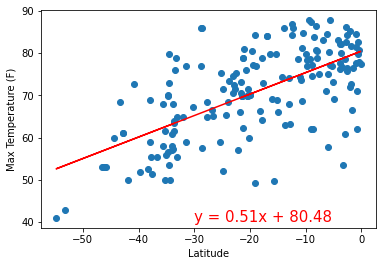

In [41]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/SouthernHemisphere_MaxTemp_Latitude.png')
plt.show()

In the southern hemisphere, maximum temperature is positively correlated with latitude. The correlation is not very strong.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022795468198796107


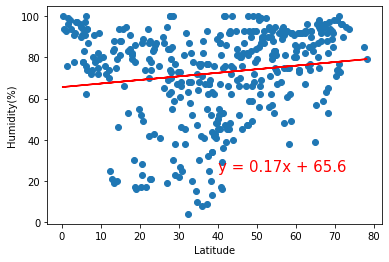

In [42]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/NorthernHemisphere_Humidity_Latitude.png')
plt.show()

There is a very weak positive correlation between humidity and latitude in the northern hemisphere. However, a linear regression line should not be used because the data is scattered, and does not follow a linear trend. 

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021296811216293204


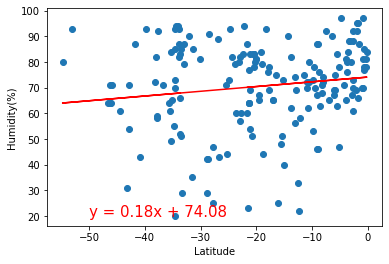

In [43]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/SouthernHemisphere_Humidity_Latitude.png')
plt.show()

There is a very weak positive correlation between humidity and latitude in the southern hemisphere if a linear regression line is fitted to the data. However, a linear regression line should not be used because the data is scattered, and does not follow a linear trend. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.021797775920996083


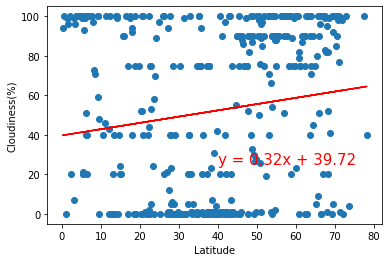

In [44]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/NorthernHemisphere_Cloudiness_Latitude.png')
plt.show()

There is a very weak positive correlation between cloudiness and latitude in the northern hemisphere if a linear regression line is fitted to the data. However, a linear regression line should not be used because the data is scattered, and does not follow a linear trend. 

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0064498268203385944


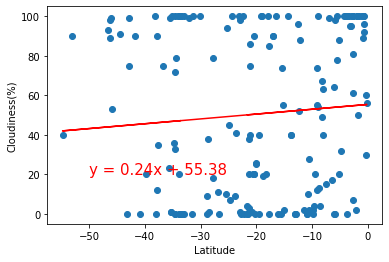

In [45]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/SouthernHemisphere_Cloudiness_Latitude.png')
plt.show()

There is a very weak positive correlation between cloudiness and latitude in the southern hemisphere if a linear regression line is fitted to the data. However, a linear regression line should not be used because the data is scattered, and does not follow a linear trend.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06690898535579634


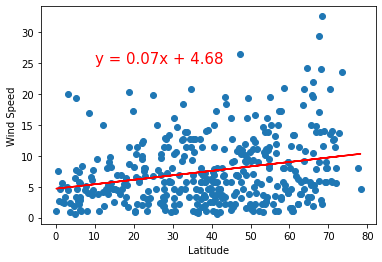

In [46]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/NorthernHemisphere_WindSpeed_Latitude.png')
plt.show()

There is a very weak positive correlation between wind speed and latitude in the northern hemisphere if a linear regression line is fitted to the data. However, a linear regression line should not be used because the data is scattered, and does not follow a linear trend.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024734567274924547


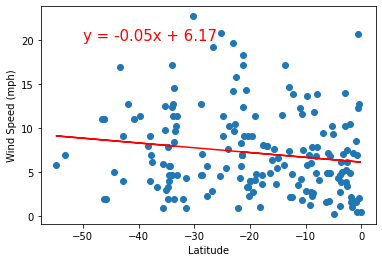

In [47]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/SouthernHemisphere_WindSpeed_Latitude.png')
plt.show()

There is a very weak negative correlation between wind speed and latitude in the southern hemisphere if a linear regression line is fitted to the data. However, a linear regression line should not be used because the data is scattered, and does not follow a linear trend.